**Pseudocode for forecasting**


x = last_values_of_train_set

predictions = []

for i in range(length_of_forecast):

    x_next = model.predict(x)
    
    predictions.append(x_next)
    
    x = np.concat((x[1:], x_next))

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

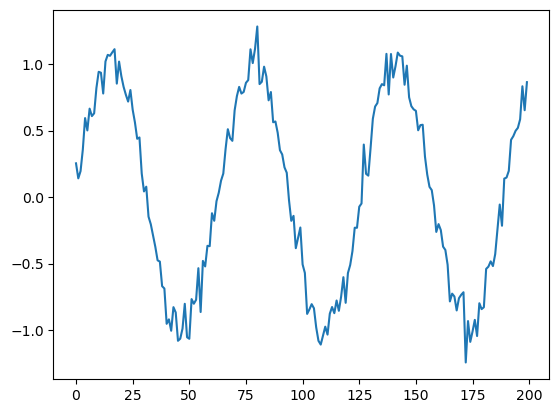

In [2]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 # adding noise

plt.plot(series)
plt.show()

In [3]:
T =10
X =[]
Y =[]

for t in range(len(series)-T):
    x= series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)



X.shape (190, 10) Y.shape (190,)


In [4]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

r = model.fit(
X[:-N//2], Y[:-N//2],
epochs = 80,
validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4199 - val_loss: 0.2421
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1265 - val_loss: 0.0751
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0690 - val_loss: 0.0382
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0490 - val_loss: 0.0578
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0446 - val_loss: 0.0666
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0607 - val_loss: 0.0513
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0410 - val_loss: 0.0449
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0340 - val_loss: 0.0306
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0237 - val_loss: 0.0263
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0199 - val_loss: 0.0274
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0269 - val_loss: 0.0285
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0247 - val_loss: 0.0268
Epoch 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - val_loss: 0.0187
Epoch 71/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0161 - val_loss: 0.0168
Epoch 72/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0151 - val_loss: 0.0165
Epoch 73/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 74/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0164 - val_loss: 0.0155
Epoch 75/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 76/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - val_loss: 0.0156
Epoch 77/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - val_loss: 0.0164
Epoch 78/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0153
Epoch 79/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - val_loss: 0.0156
Epoch 80/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0151 - val_loss: 0.0158


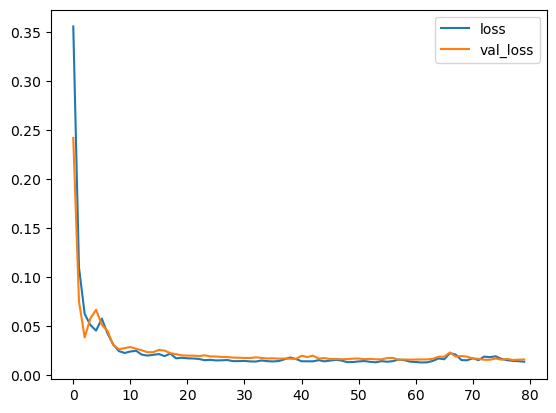

In [5]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [6]:
# INCORRECT WAY OF FORECASTING
validation_target = Y[-N//2:]
validation_predictions = []

i= -N//2

while len(validation_predictions)< len(validation_target):
    p= model.predict(X[i].reshape(1,-1))[0,0]
    i+=1
    validation_predictions.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

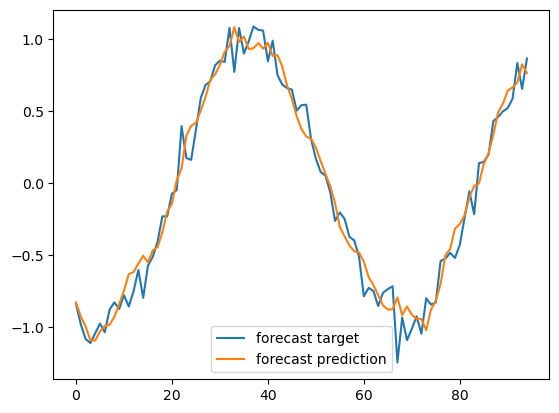

In [7]:

plt.plot(validation_target, label ='forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [8]:
# CORRECT WAY OF FORECASTING
validation_target2 = Y[-N//2:]
validation_predictions2 = []

# last train input, from this we take predicted output as input
last_x = X[-N//2] # 1 D array of length T

while len(validation_predictions)< len(validation_target):
    p= model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    # make the new input, updating input with predicted output
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

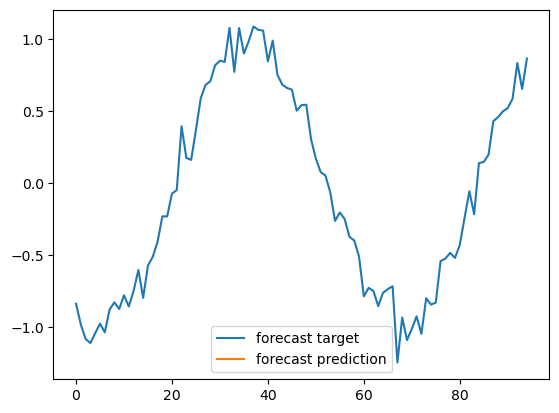

In [9]:

plt.plot(validation_target2, label ='forecast target')
plt.plot(validation_predictions2, label = 'forecast prediction')
plt.legend()

**RNN psuedocode**

Wxh - input to hidden weight

Whh - hidden to hidden weight

bh - hidden bias

Wo - hidden to output weight

bo - output bias

X - T×D input matrix

tanh hidden activation

softmax output activation


Yhat = []

h_last = h0

for t in range(T):
    
    h_t = tanh(X[t].dot(Wx) + h_last.dot(Wh) + bh)
    
    yhat = softmax(h_t.dot(Wo) + bo)
    
    Yhat.append(yhat)

important, don’t forget to update h_last

h_last = h_t



**RNN CODE**


In [10]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

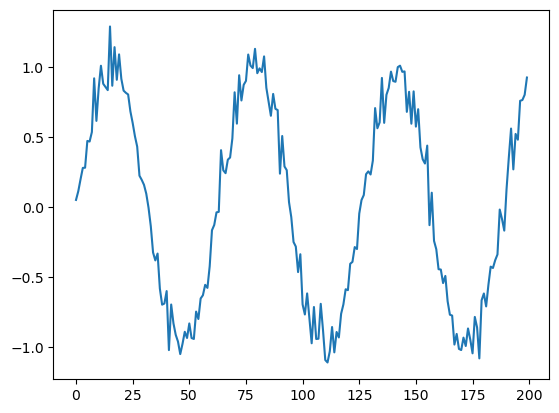

In [11]:
series2 = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 # adding noise

plt.plot(series2)
plt.show()

In [12]:
T =10
D =1
X =[]
Y =[]

for t in range(len(series2)-T):
    x= series2[t:t+T]
    X.append(x)
    y = series2[t+T]
    Y.append(y)

X = np.array(X).reshape(-1,T,1) #NxTxD
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)



X.shape (190, 10, 1) Y.shape (190,)


In [60]:
i = Input(shape=(T,1))
x = SimpleRNN(5, activation = None)(i) #defalut activation is tanh
x = Dense(1)(x)
model = Model(i,x)
model.compile(
    loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

r2 = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 27.3720 - val_loss: 0.8796
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7787 - val_loss: 0.7214
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4938 - val_loss: 0.3491
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2250 - val_loss: 0.1785
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1741 - val_loss: 0.1733
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1884 - val_loss: 0.2121
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2557 - val_loss: 0.2278
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2779 - val_loss: 0.2101
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2308 - val_loss: 0.1909
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2084 - val_loss: 0.1836
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2018 - val_loss: 0.1756
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1732 - val_loss: 0.1509


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0175 - val_loss: 0.0185
Epoch 71/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 72/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 73/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0160 - val_loss: 0.0185
Epoch 74/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0165 - val_loss: 0.0187
Epoch 75/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0198 - val_loss: 0.0184
Epoch 76/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0193 - val_loss: 0.0183
Epoch 77/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - val_loss: 0.0184
Epoch 78/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 79/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0176 - val_loss: 0.0183
Epoch 80/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0180 - val_loss: 0.0183


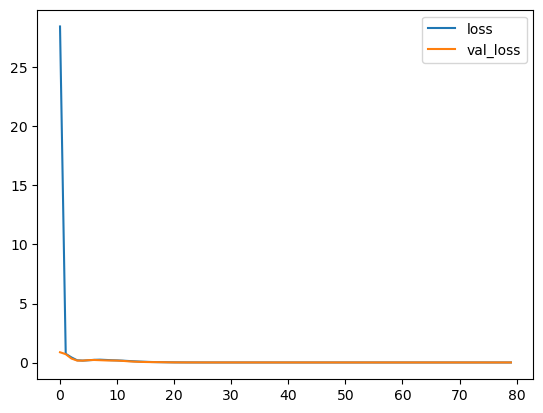

In [61]:
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label ='loss')
plt.plot(r2.history['val_loss'], label = 'val_loss')
plt.legend()

In [62]:
print(model.input_shape)


(None, 10, 1)


In [63]:
# INCORRECT WAY OF FORECASTING
validation_target_1 = Y[-N//2:]
validation_predictions_1 = []

i= -N//2

while len(validation_predictions_1)< len(validation_target_1):
    p1 = model.predict(X[i].reshape(1,-1,1))[0,0]
    i+=1
    
    validation_predictions_1.append(p1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

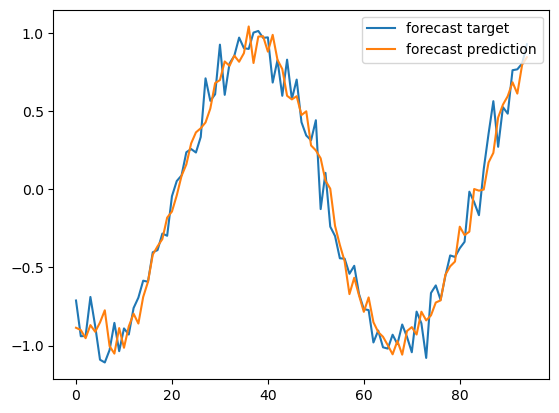

In [64]:

plt.plot(validation_target_1, label ='forecast target')
plt.plot(validation_predictions_1, label = 'forecast prediction')
plt.legend()

In [65]:
# CORRECT WAY OF FORECASTING
validation_target_r2 = Y[-N//2:]
validation_predictions_r2 = []

# last train input, from this we take predicted output as input
last_x = X[-N//2] # 1 D array of length T

while len(validation_predictions_r2)< len(validation_target_r2):
    p= model.predict(last_x.reshape(1,-1, 1))[0,0]
    validation_predictions_r2.append(p)
    
    # make the new input, updating input with predicted output
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

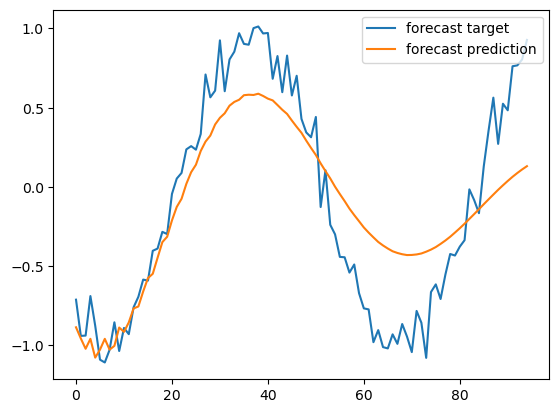

In [66]:

plt.plot(validation_target_r2, label ='forecast target')
plt.plot(validation_predictions_r2, label = 'forecast prediction')
plt.legend()